<a href="https://colab.research.google.com/github/himaff/heart-diseases/blob/main/heart_Diseases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Le contexte**

Les maladies cardiovasculaires (MCV) sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus Ã  des crises cardiaques et Ã  des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un évènement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent Ãªtre utilisées pour prédire une éventuelle maladie cardiaque.

Les personnes atteintes de maladies cardiovasculaires ou Ã  haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjÃ  établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.



**Informations sur les attributs**

AGE : âge du patient

SEXE : sexe du patient [homme, femme]

TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]

PAR : pression artérielle au repos [mm Hg]

CHOLESTEROL : cholestérol sérique [mm/dl]

GAJ : glycémie Ã  jeun [1 : si glycémie Ã  jeun > 120 mg/dl, 0 : sinon]

ECG au repos : résultats de l'électrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]

FCMAX : fréquence cardiaque maximale atteinte 

ANGINE : angine induite par l'exercice [Oui, Non]

DEPRESSION : Valeur numérique mesurée en dépression

PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]

COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

In [32]:
# importation du datasrt
df = pd.read_excel("/content/8e49d734-bd63-432d-814e-6c4599f33f04.xlsx")

In [33]:
# affichage du jeu de données
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [34]:
# on va essayé de voir les informations de notre jeu de données
df.info()
#renommer la variable dépression pour retirer une espace
df.rename(columns={"DEPRESSION ": "DEPRESSION"}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


il y a **918 lignes** et **12 colonnes** dans notre jeu de données
Nous avons donc **7 variables quantitatives** et **5 variables qualitatives**

notre jeu de donnée n'a aucune valeur manquante

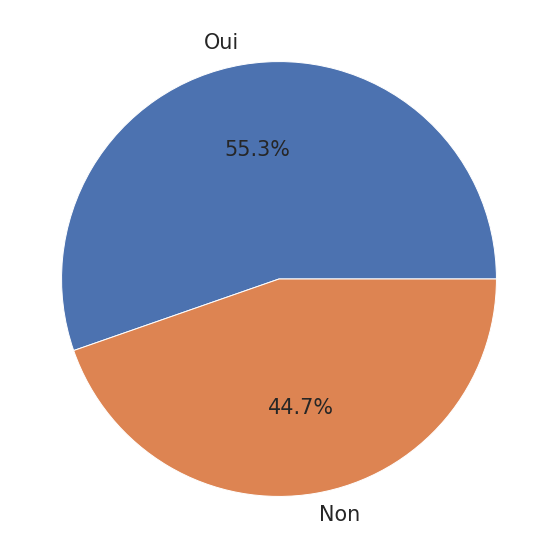

In [35]:
# visualisation de la cible
plt.figure(figsize=(10,10))
plt.pie(df['CŒUR'].value_counts(),labels=["Oui", "Non"], autopct='%1.1f%%', textprops={'size': 'xx-large'},)
plt.show()

la distribution de notre variable cible "coeur" est plutot bien distribué avec 44,7% de non et 55,3% de oui

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


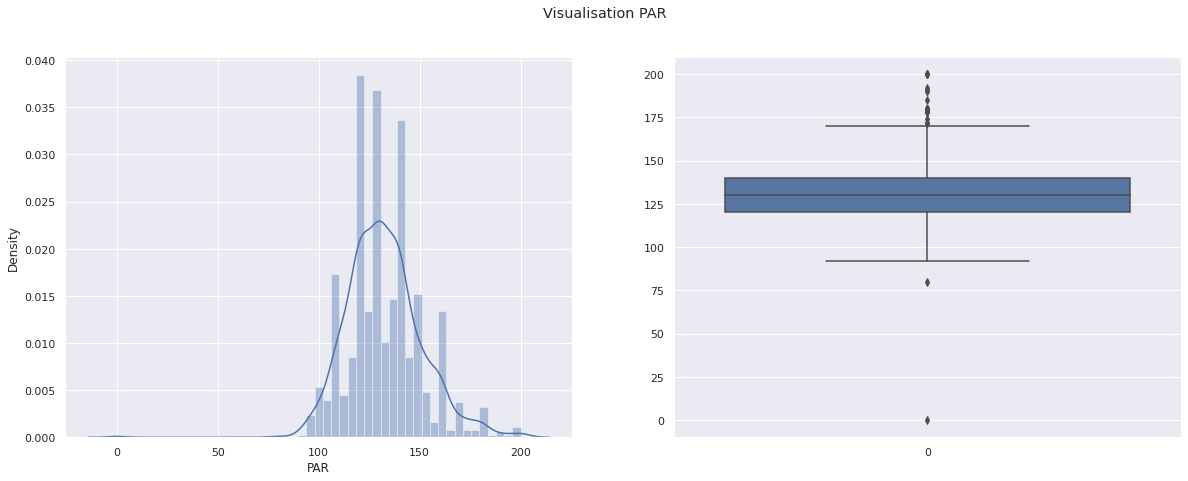

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


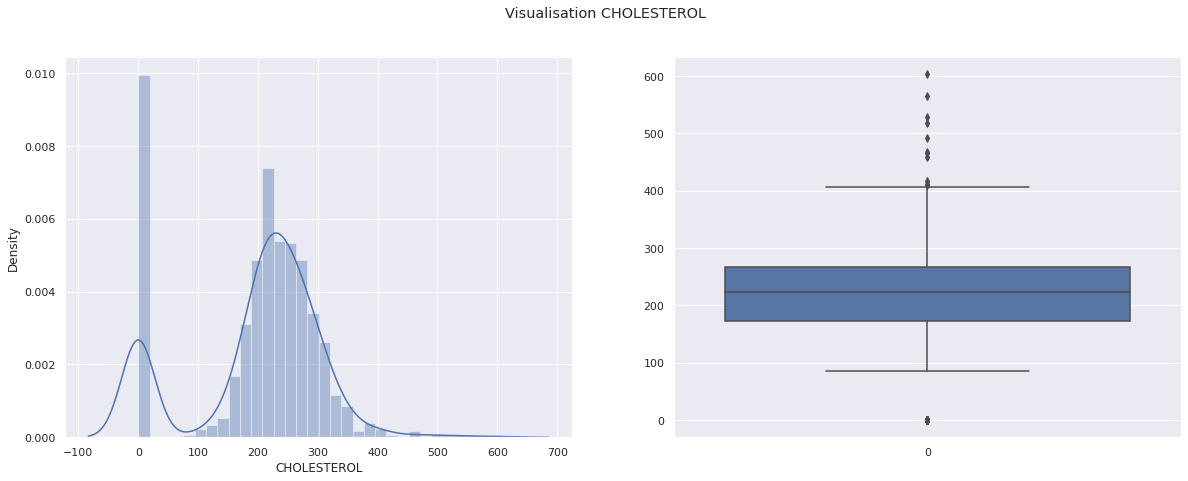

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


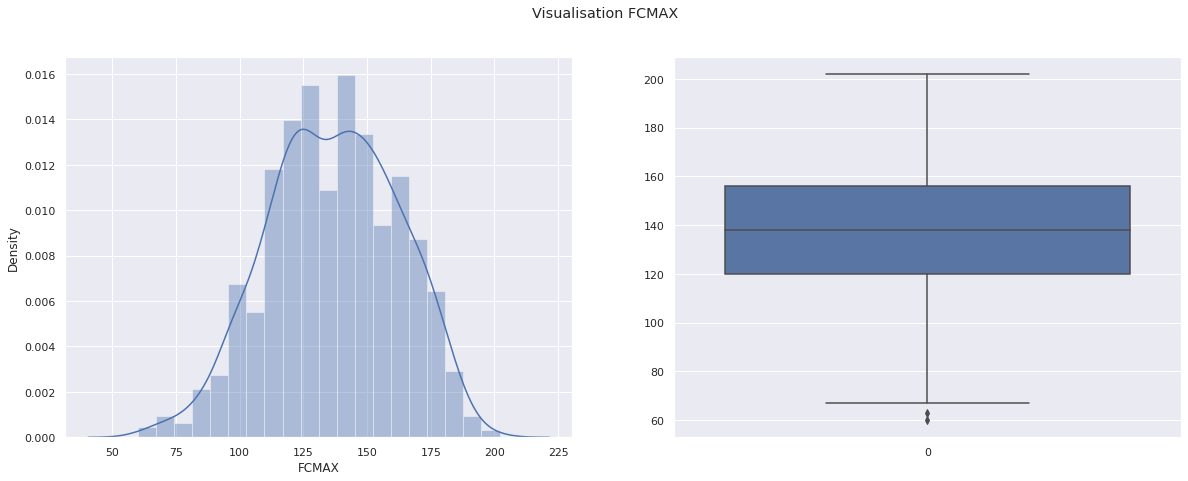

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


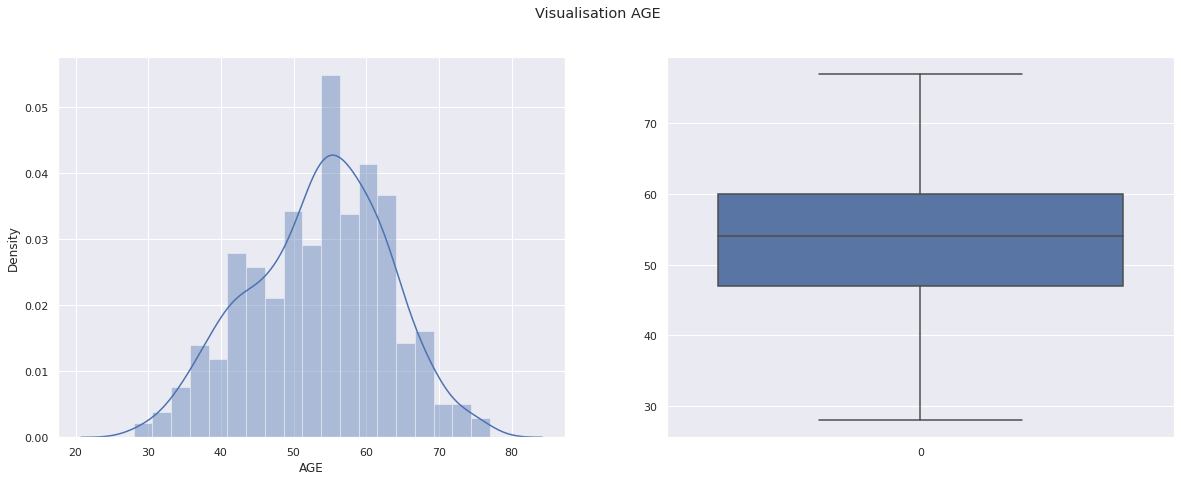

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


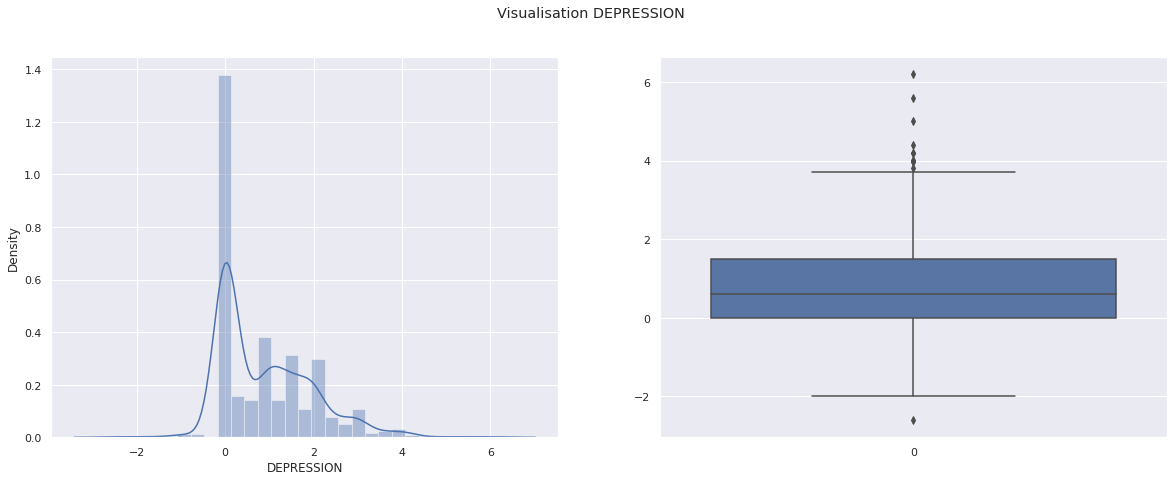

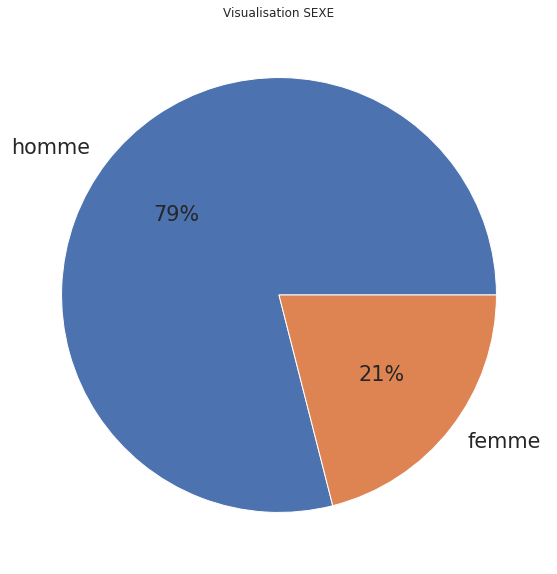

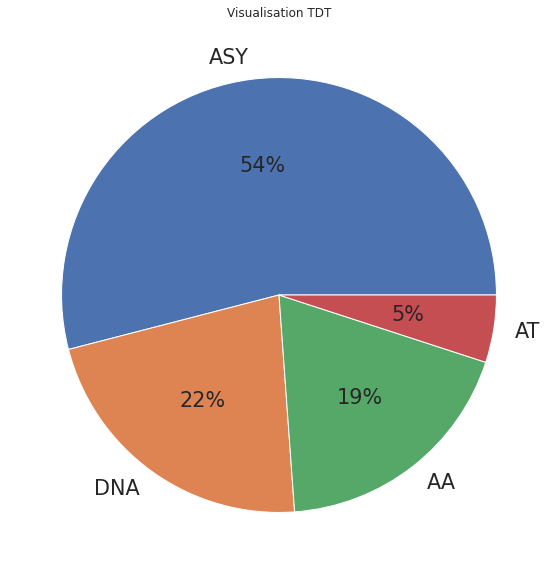

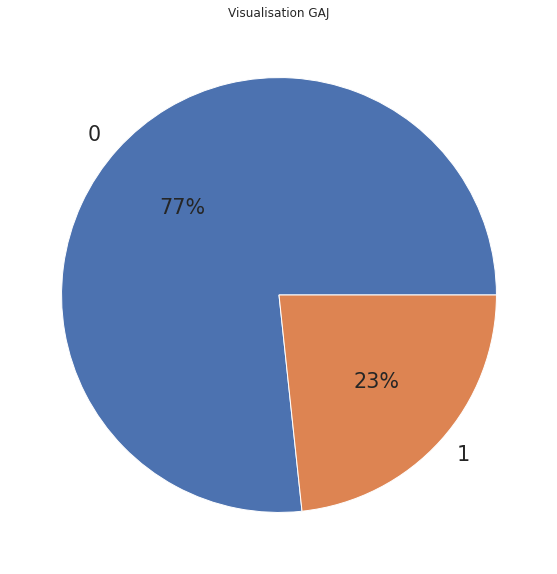

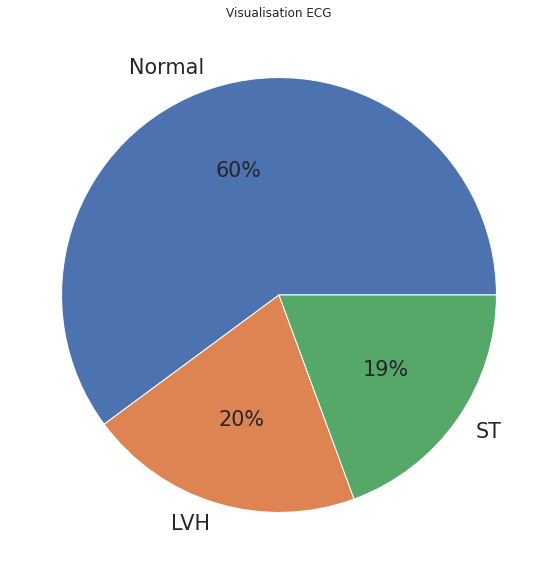

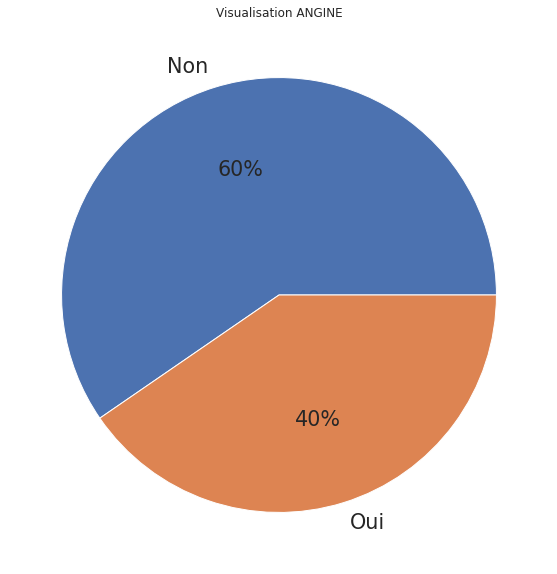

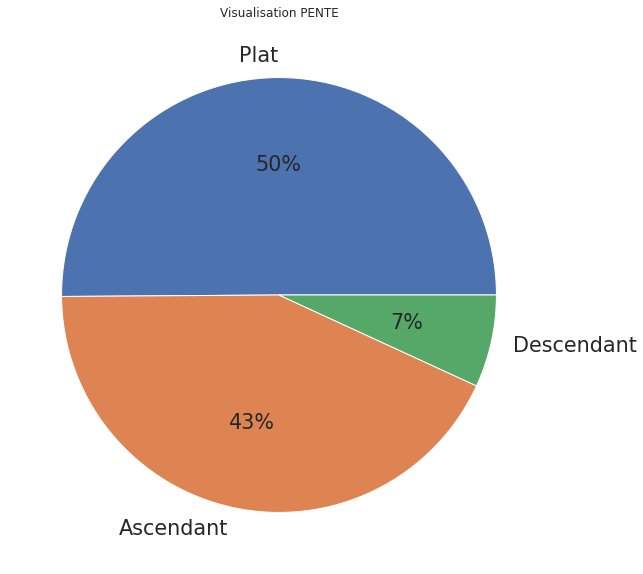

In [36]:
#visualisation des variables quantitatives (AGE, PAR, CHOLESTEROL, FCMAX, DEPRESSION)
sns.set_theme()

for col in ['PAR', 'CHOLESTEROL', 'FCMAX', 'AGE', 'DEPRESSION']:
  fig, axes = plt.subplots(figsize=(20,7), nrows=1, ncols=2)
  fig.suptitle('Visualisation '+col)
  sns.distplot(a=df[col], ax=axes[0])
  sns.boxplot(data=df[col], ax=axes[1])
  plt.show()

#visualisation des variables qualitative (SEXE, TDT, GAJ, ECG, ANGINE, PENTE)
for col in ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE']:
  plt.figure(figsize=(10,10))
  plt.title('Visualisation '+col)
  plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%.0f%%', textprops={'size': 'xx-large'},)
  plt.show()

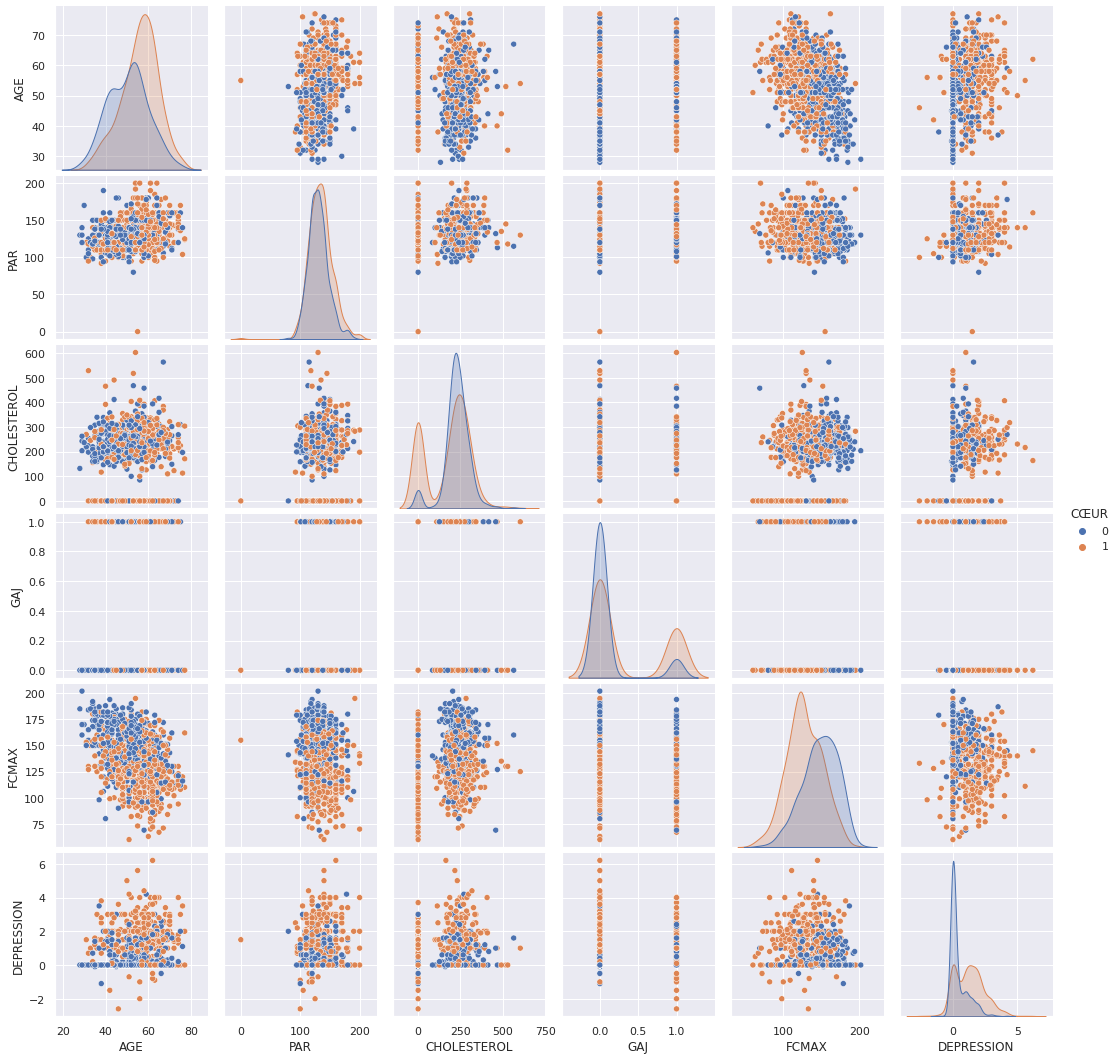

In [37]:
# voyons le lien entre les variables

sns.pairplot(df, hue='CŒUR')

Notre variable cible: **Coeur**


**Visualisation de la variable cible**

Preprocessing

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestClassifier


In [39]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [45]:
def encodage(df):
    code = {
        'homme': 1,
        'femme': 0,
        'AT': 0,
        'AA': 1,
        'DNA': 2,
        'ASY': 3,
        'Normal': 0,
        'ST': 1,
        'HVG': 2,
        'Oui': 1,
        'Non': 0,
        'Ascendant': 1,
        'Plat': 0,
        'Descendant': 2
    }

    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)

    df.dropna(axis=0, inplace=True)

    X = df.drop('CŒUR', axis=1)
    y = df['CŒUR']
    
    return X, y

In [46]:
X_train, y_train = encodage(trainset)
X_test, y_test = encodage(testset)

In [47]:
def evaluation(model_dict):
    for key, model in model_dict.items():
        model.fit(X_train, y_train)
        ypred = model.predict(X_test)
        N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

        plt.figure(figsize=(12,8))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score') 
        plt.legend()
        plt.title(key)
        
        print(key)
        #print(pd.DataFrame(confusion_matrix(y_test, ypred)))
        plot_confusion_matrix(model, X_test, y_test)  
        plt.show()  
        print(classification_report(y_test, ypred))
        

        print(':----------------------------------------------------')

In [48]:
model_list = {
    "Random Forest": RandomForestClassifier(random_state=0)
}

Random Forest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


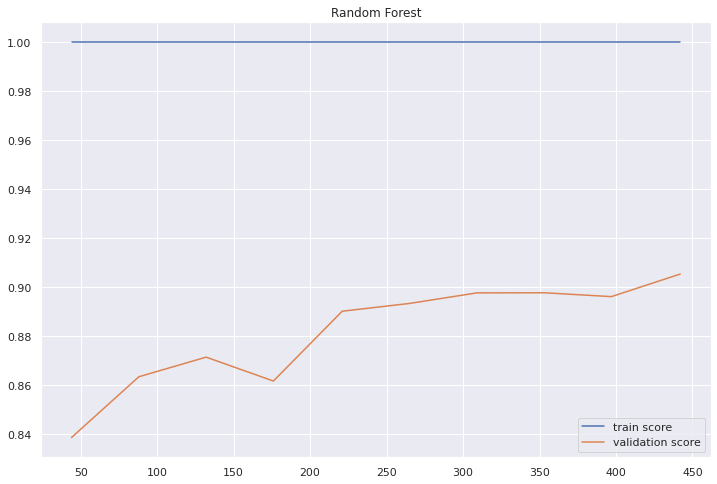

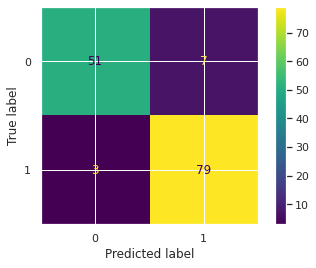

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        58
           1       0.92      0.96      0.94        82

    accuracy                           0.93       140
   macro avg       0.93      0.92      0.93       140
weighted avg       0.93      0.93      0.93       140

:----------------------------------------------------


In [49]:
evaluation(model_list)